# Numerisk derivasjon
Nå skal vi se på hvordan vi kan derivere på datamaskinen. Når du deriverer for hånd med regneregler, driver du med _analytisk_ derivasjon. Dette gir alltid eksakte svar, men reglene kan være kompliserte å bruke. Dessuten kan vi ikke derivere diskrete datapunkter for hånd – analytisk derivasjon begrenser seg til matematiske funksjoner. Vi skal derfor se på hvordan vi kan tilnærme den deriverte på datamaskinen. Dette kaller vi _numerisk_ derivasjon.

```{admonition} Hva er den deriverte?
Diskuter i grupper:
1. Hva er derivasjon?
2. Hva betyr det å derivere?
3. Hvorfor er fart den deriverte av posisjon? Og hvorfor er akselerasjon den deriverte av fart?
4. Hva er sammenhengen mellom gjennomsnittlig vekstfart og den deriverte?
5. Undring: Kan vi derivere et digitalt bilde? Hvordan ser i så fall den deriverte av et bilde ut?
```

## Gjennomsnittlig vekstfart

Siden derivasjon handler om momentan vekst, starter vi med gjennomsnittlig vekstfart: $a = \frac{\Delta y}{\Delta x}$. Den gjennomsnittlige veksten i et intervall $[a, b]$ kan også beskrives som stigningstallet til sekanten mellom punkt $a$ og $b$, som illustrert nedenfor. Klipp på knappen "Activate" og kjør koden ved å trykke på "Run". Da kan du justere glideren slik at _dx_ blir mindre og mindre.

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.css" integrity="sha512-5A8nwdMOWrSz20fDsjczgUidUBR8liPYU+WymTZP1lmY9G6Oc7HlZv156XqnsgNUzTyMefFTcsFH/tnJE/+xBg==" crossorigin="anonymous" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js"></script>
<script type="text/x-thebe-config">
  {
    requestKernel: true,
    binderOptions: {
      repo: "matplotlib/ipympl",
      ref: "0.6.1",
      repoProvider: "github",
    },
  }
</script>
<script src="https://unpkg.com/thebe@latest/lib/index.js"></script>

<button id="activateButton" style="width: 120px; height: 40px; font-size: 1.5em;">
  Activate
</button>
<script>
var bootstrapThebe = function() {
    thebe.bootstrap();
}
document.querySelector("#activateButton").addEventListener('click', bootstrapThebe)
</script>

<pre data-executable="true" data-language="python">
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# Definer funksjonen og dens deriverte
def f(x):
    return x**2

def f_derivert(x):
    return 2*x

def sekant(x0, x1):
    x_sekant = np.array([x0, x1])
    y_sekant = f(x0) + (f(x1) - f(x0)) / (x1 - x0) * (x_sekant - x0)
    return x_sekant, y_sekant

# Funksjon for å tegne plottet
def tegn_plott_justert(dx=1):
    # Grenser for sekanten
    x0 = 1 
    x1 = x0 + dx
    
    stigningstall = (f(x1) - f(x0)) / (x1 - x0)

    x_verdier = np.linspace(0, 3, 400)
    y_verdier = f(x_verdier)

    x_sekant, y_sekant = sekant(x0, x1)
    x_sekant_utvidet = np.linspace(min(x0, x1) - 1, max(x0, x1) + 1, 400)
    y_sekant_utvidet = f(x0) + (y_sekant[1] - y_sekant[0]) / (x_sekant[1] - x_sekant[0]) * (x_sekant_utvidet - x0)

    plt.figure(figsize=(10,6))
    plt.plot(x_verdier, y_verdier, label='f(x) = x²')
    plt.plot(x_sekant_utvidet, y_sekant_utvidet, label='Sekantlinje', color='red')

    # Plott tangentlinjen når dx går mot 0
    if dx <= 0.001:
        plt.plot(x_verdier, f(x0) + f_derivert(x0) * (x_verdier - x0), label='Tangentlinje (nærmer seg når dx -> 0)', color='green')

    # Merk punktene hvor vi beregner vekstfarten
    plt.scatter([x0, x1], [f(x0), f(x1)], color='black')
    plt.text(x0, f(x0) + 0.5, f"A ({x0}, {f(x0)})", verticalalignment='bottom')
    plt.text(x1, f(x1) - 0.5, f"B ({x1}, {round(f(x1), 2)})", verticalalignment='top')
    
    plt.text(0, 3, f"Stigningstall: {stigningstall:.2f}", fontsize=12, color='blue')
    plt.title('Fra gjennomsnittlig til momentan vekstfart')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc="upper center")
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

# Opprett en interaktiv glider for å endre dx-verdien med mindre steg
interact(tegn_plott_justert, dx=(0.001, 1, 0.001)); # semikolon for å ikke vise unødvendig output om funksjonskallet
</pre>

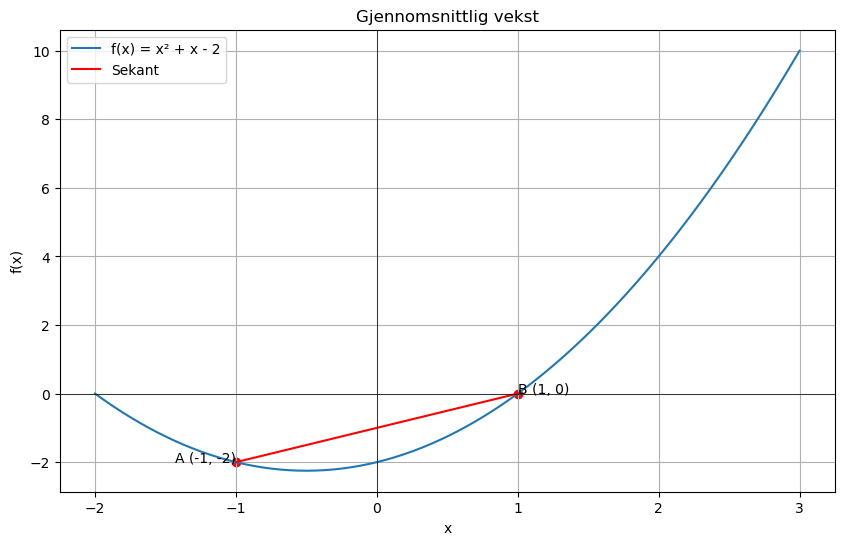

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2 + x - 2

def gjennomsnittlig_vekst(a, b):
    return (f(b) - f(a)) / (b - a)

x = np.linspace(-2, 3, 400)
y = f(x)
a, b = -1, 1

sekant_x = np.array([a, b])
sekant_y = f(a) + gjennomsnittlig_vekst(a, b) * (sekant_x - a)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='f(x) = x² + x - 2')
plt.plot(sekant_x, sekant_y, label='Sekant', color='red')
plt.scatter([a, b], [f(a), f(b)], color='red')
plt.text(a, f(a), f"A ({a}, {f(a)})", horizontalalignment='right')
plt.text(b, f(b), f"B ({b}, {f(b)})", horizontalalignment='left')

plt.title('Gjennomsnittlig vekst')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

```{admonition} Oppgave 1a: Gjennomsnittlig fart
:class: hint
I denne oppgava skal du lage et program som finner gjennomsnittlig vekstfart for funksjonen $f(x) = x^2 + x - 2$ i intervallet $[-1, 1]$. Du kan lage programmet uten hjelp, eller du kan benytte hintet nedenfor. 
```

```{admonition} Hint
:class: hint,dropdown
1. Definer funksjonen $f(x) = x^2 + x - 2$.
2. Definer intervallet du skal finne vekstfarten i.
3. Regn ut forskjellen i _x_ ($\Delta x$).
4. Regn ut forskjellen i _y_ ($\Delta y$) ved å bruke funksjonen _f_.
5. Regn ut den gjennomsnittlige veksten.
6. Skriv ut den gjennomsnittlige veksten.
```

```{admonition} Oppgave 1b: Gjennomsnittlig fart som funksjon
:class: hint
Hvis du syns at Python-funksjoner er greit å forstå, kan du prøve å lage en funksjon som heter _vekstfart_ som fungerer som i oppgava ovenfor. Funksjonen skal ta som parametre en funksjon _f_ og intervallet i form av grensene til intervallet, _a_ og _b_. Bruk funksjonen til å finne gjennomsnitlig vekstfart for følgende funksjoner og intervaller:

a) $f(x) = x^3 + 4x + 7$ for [2, 4]
b) $f(x) = \sqrt{2x^2 + 2}$ for [-1, 6]
```

Nå skal vi prøve å gå fra gjennomsnittlig til momentan vekstfart. Det betyr bare at vi vill finne veksten i funksjonen vår ettersom $\Delta x$ øker så lite som mulig. Bruk den interaktive figuren nedenfor og reduser _dx_ gradvis. Hva skjer med den gjennomsnittlige veksten? Hva har dette med derivasjon å gjøre?

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# Definer funksjonen og dens deriverte
def f(x):
    return x**2

def f_derivert(x):
    return 2*x

def sekant(x0, x1):
    x_sekant = np.array([x0, x1])
    y_sekant = f(x0) + (f(x1) - f(x0)) / (x1 - x0) * (x_sekant - x0)
    return x_sekant, y_sekant

# Funksjon for å tegne plottet
def tegn_plott_justert(dx=1):
    # Grenser for sekanten
    x0 = 1 
    x1 = x0 + dx
    
    stigningstall = (f(x1) - f(x0)) / (x1 - x0)

    x_verdier = np.linspace(0, 3, 400)
    y_verdier = f(x_verdier)

    x_sekant, y_sekant = sekant(x0, x1)
    x_sekant_utvidet = np.linspace(min(x0, x1) - 1, max(x0, x1) + 1, 400)
    y_sekant_utvidet = f(x0) + (y_sekant[1] - y_sekant[0]) / (x_sekant[1] - x_sekant[0]) * (x_sekant_utvidet - x0)

    plt.figure(figsize=(10,6))
    plt.plot(x_verdier, y_verdier, label='f(x) = x²')
    plt.plot(x_sekant_utvidet, y_sekant_utvidet, label='Sekantlinje', color='red')

    # Plott tangentlinjen når dx går mot 0
    if dx <= 0.001:
        plt.plot(x_verdier, f(x0) + f_derivert(x0) * (x_verdier - x0), label='Tangentlinje (nærmer seg når dx -> 0)', color='green')

    # Merk punktene hvor vi beregner vekstfarten
    plt.scatter([x0, x1], [f(x0), f(x1)], color='black')
    plt.text(x0, f(x0) + 0.5, f"A ({x0}, {f(x0)})", verticalalignment='bottom')
    plt.text(x1, f(x1) - 0.5, f"B ({x1}, {round(f(x1), 2)})", verticalalignment='top')
    
    plt.text(0, 3, f"Stigningstall: {stigningstall:.2f}", fontsize=12, color='blue')
    plt.title('Fra gjennomsnittlig til momentan vekstfart')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc="upper center")
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

# Opprett en interaktiv glider for å endre dx-verdien med mindre steg
interact(tegn_plott_justert, dx=(0.001, 1, 0.001)); # semikolon for å ikke vise unødvendig output om funksjonskallet

interactive(children=(FloatSlider(value=1.0, description='dx', max=1.0, min=0.001, step=0.001), Output()), _do…

```{admonition} Oppgave 2: Fra gjennomsnittlig til momentan vekstfart
:class: hint
Modifiser programmet ditt fra oppgave 1 slik at det finner den momentane veksten i et punktet $x = 1$ istedenfor i et intervall. Velg en liten $dx$, for eksempel $dx = 10^{-8}$
```

## Derivasjon
Derivasjon handler om endring, nærmere bestemt _momentan_ endring. Den deriverte kan beskrive forandringen i et forløp, for eksempel forandringen i posisjon (fart) eller hvor mye temperaturen endrer seg utover dagen. Vi kan se på det på samme måte som med gjennomsnittlig vekst – den eneste forskjellen er at $\Delta x$ er så liten som mulig. Dette representerer vi med en _grenseverdi_:

$$f'(x) = \frac{dy}{dx} = \lim_{\Delta x \rightarrow 0} \frac{\Delta y}{\Delta x} = \lim_{\Delta x \rightarrow 0} \frac{f(x+dx) - f(x)}{dx}$$

Denne grenseverdien er ikke mulig å få til på en datamaskin - ingenting kan bli uendelig lite med et endelig minne. Men vi kan tilnærme grenseverdien med en liten $\Delta x$. Det var dette du gjorde i oppgave 2. Da får vi tilnærmede verdier til den deriverte. Det blir altså sjeldent helt eksakt, men ofte godt nok til de fleste praktiske formål!


```{admonition} Numerisk derivasjon
For en liten verdi av $dx$ kan vi tilnærme den førstederiverte slik:

$$f'(x) = \frac{df}{dx} \approx \frac{f(x+dx) - f(x)}{dx}$$
```

```{admonition} Oppgave 3: Numerisk derivasjon
:class: tip
Bruk definisjonen ovenfor og regn ut $f'(1)$ for $f(x) = 2x + 2$. Sett $dx = 1\cdot 10^{-8}$.
```

```{admonition} Oppgave 4a: Numerisk derivasjon som funksjon
:class: tip
Løs dette puslespillet, som er et program med numerisk derivasjon som en funksjon. Pass på både innrykk og rekkefølge. Når dere har fått til puslespillet, kan dere forklare for hverandre hva programmet gjør.
```

```{admonition} Oppgave 4b: Numerisk derivasjon som funksjon
:class: tip
Bruk programmet som du fikk i puslespillet til å finne $f'(2)$ for funksjonen $f(x) = (x - 2x^2)^(3/2)$. Kontroller ved å regne for hånd.
```

```{admonition} Oppgave 5: Plotting av den deriverte
:class: tip
Lag et program som plotter grafen til funksjonen 𝑓 og den _numerisk_ deriverte i samme koordinatsystem for _x_-verdier i [−3, 4]. Beskriv sammenhengen mellom de to grafene. Du kan ta utgangspunkt i programmet nedenfor, som plotter to funksjoner i samme koordinatsystem. Prøv å fjerne/kommentere ut ulike linjer for å se hvordan de forskjellige funksjonene fungerer før du plotter den deriverte.

<iframe src="https://trinket.io/embed/python3/5d45ef0b97" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>
```